In [30]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift, AgglomerativeClustering, AffinityPropagation, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import fileinput
import numpy as np
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from scipy.stats.mstats import winsorize
import hdbscan
from sklearn.mixture import GaussianMixture
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/mn42899/data_scienceii/refs/heads/main/Customer_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [32]:
df.columns = df.columns.str.lower()

In [33]:
df.head()

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [35]:
df.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [36]:
df.shape

(8950, 18)

## PART 1 - DATA PRE-PROCESSING

- Clean and prepare the data. Remember to treat data issues, perform feature scaling, encoding and any other relevant transformations.
- If applicable, use dimensionality reduction and discuss how it impacts the clusters.
- Explain your data preparation process.

- Standardization will most likely be neccessary to handle outliers that that may skew our clustering
    - Will implemenent Principle Component Analysis to :
        - further reduce any potential noise and redundency our dataset may have
        - Deal with multicollinearity with our dataset to prevent distortion between clusters

In [37]:
# Mistake in cash_advance_frequency where max is 1.5, remapped to 1 as the user is a frequent cash advance credit card user
df[df['cash_advance_frequency'] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
681,C10708,5656.069801,1.000000,362.36,362.36,0.0,7240.433194,0.250000,0.250000,0.0,1.250000,12,2,8000.0,683.421497,2036.877611,0.0,8
1626,C11680,2876.009336,1.000000,152.61,152.61,0.0,3719.650168,0.333333,0.333333,0.0,1.166667,24,2,4000.0,248.342971,584.926336,0.0,6
2555,C12629,5906.184924,1.000000,141.80,141.80,0.0,1651.286918,0.125000,0.125000,0.0,1.125000,12,2,10000.0,933.969974,919.289675,0.0,8
2608,C12684,7801.511533,1.000000,231.40,231.40,0.0,4109.465221,0.100000,0.100000,0.0,1.100000,20,3,13500.0,1593.617739,1522.496755,0.0,10
3038,C13127,3846.742530,1.000000,0.00,0.00,0.0,1932.460679,0.000000,0.000000,0.0,1.500000,18,0,5600.0,496.245836,538.346874,0.0,6
3253,C13347,5709.486507,0.833333,0.00,0.00,0.0,2794.326341,0.000000,0.000000,0.0,1.166667,10,0,6000.0,550.513331,1299.463370,0.0,6
8055,C18273,1917.895730,1.000000,285.07,285.07,0.0,6084.858872,0.363636,0.363636,0.0,1.090909,28,6,3000.0,5692.682993,556.449635,0.0,11
8365,C18588,3857.562230,1.000000,0.00,0.00,0.0,2127.213754,0.000000,0.000000,0.0,1.142857,26,0,5000.0,617.508991,538.396872,0.0,7


In [38]:
#Standardize all users to frequent max scale 1

df['cash_advance_frequency'] = np.where(df['cash_advance_frequency'] > 1, 1, df['cash_advance_frequency'])
df[df['cash_advance_frequency'] > 1]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure


Checking if frequency scores are consistent given the tenure of the credit card user. Have to keep in mind the dataset is only capturing a 6 month period. Some users have a far longer tenure and therefore frequency may be skewed.

In [39]:
# Checking if frequency scores are consistent given the tenure of the credit card user, s
df[df['cash_advance_trx'] == 0]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.0,0.166667,0.000000,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.00,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.000000,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.0,0.083333,0.083333,0.000000,0.0,0,1,1200.0,678.334763,244.791237,0.00,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.000000,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.000000,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.00,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.0,0.166667,0.166667,0.000000,0.0,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.0,0.333333,0.333333,0.000000,0.0,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.000000,0.833333,0.0,0,6,1000.0,275.861322,NaN,0.00,6


Thinking purchases and cash advance frequencies can be scaled to percentile

In [40]:
# Only Minimum Payments have a large amount of null values, its less than 3% of the data, going to drop the data
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [41]:
#Checking to see significance of null values, Maybe they have no values because they pay their bills earlier where they dont get a minimum payment
df[df['minimum_payments'].isna()]

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.0,12
45,C10047,2242.311686,1.000000,437.00,97.00,340.0,184.648692,0.333333,0.083333,0.333333,0.166667,2,5,2400.0,0.000000,NaN,0.0,12
47,C10049,3910.111237,1.000000,0.00,0.00,0.0,1980.873201,0.000000,0.000000,0.000000,0.500000,7,0,4200.0,0.000000,NaN,0.0,12
54,C10056,6.660517,0.636364,310.00,0.00,310.0,0.000000,0.666667,0.000000,0.666667,0.000000,0,8,1000.0,417.016763,NaN,0.0,12
55,C10057,1311.995984,1.000000,1283.90,1283.90,0.0,0.000000,0.250000,0.250000,0.000000,0.000000,0,6,6000.0,0.000000,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8919,C19160,14.524779,0.333333,152.00,152.00,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,1500.0,0.000000,NaN,0.0,6
8929,C19170,371.527312,0.333333,0.00,0.00,0.0,1465.407927,0.000000,0.000000,0.000000,0.166667,5,0,1500.0,0.000000,NaN,0.0,6
8935,C19176,183.817004,1.000000,465.90,0.00,465.9,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1500.0,0.000000,NaN,0.0,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.0,6


In [42]:
# Dropped customer ID Variable
df.drop('cust_id', axis=1, inplace=True)
df

# note: this was dropped as it is the only categorical value in the dataset and this would be non-useful for clustering

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [43]:
# Turning all null values to 0's
df.dropna(inplace=True)
df.isnull().sum()

balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

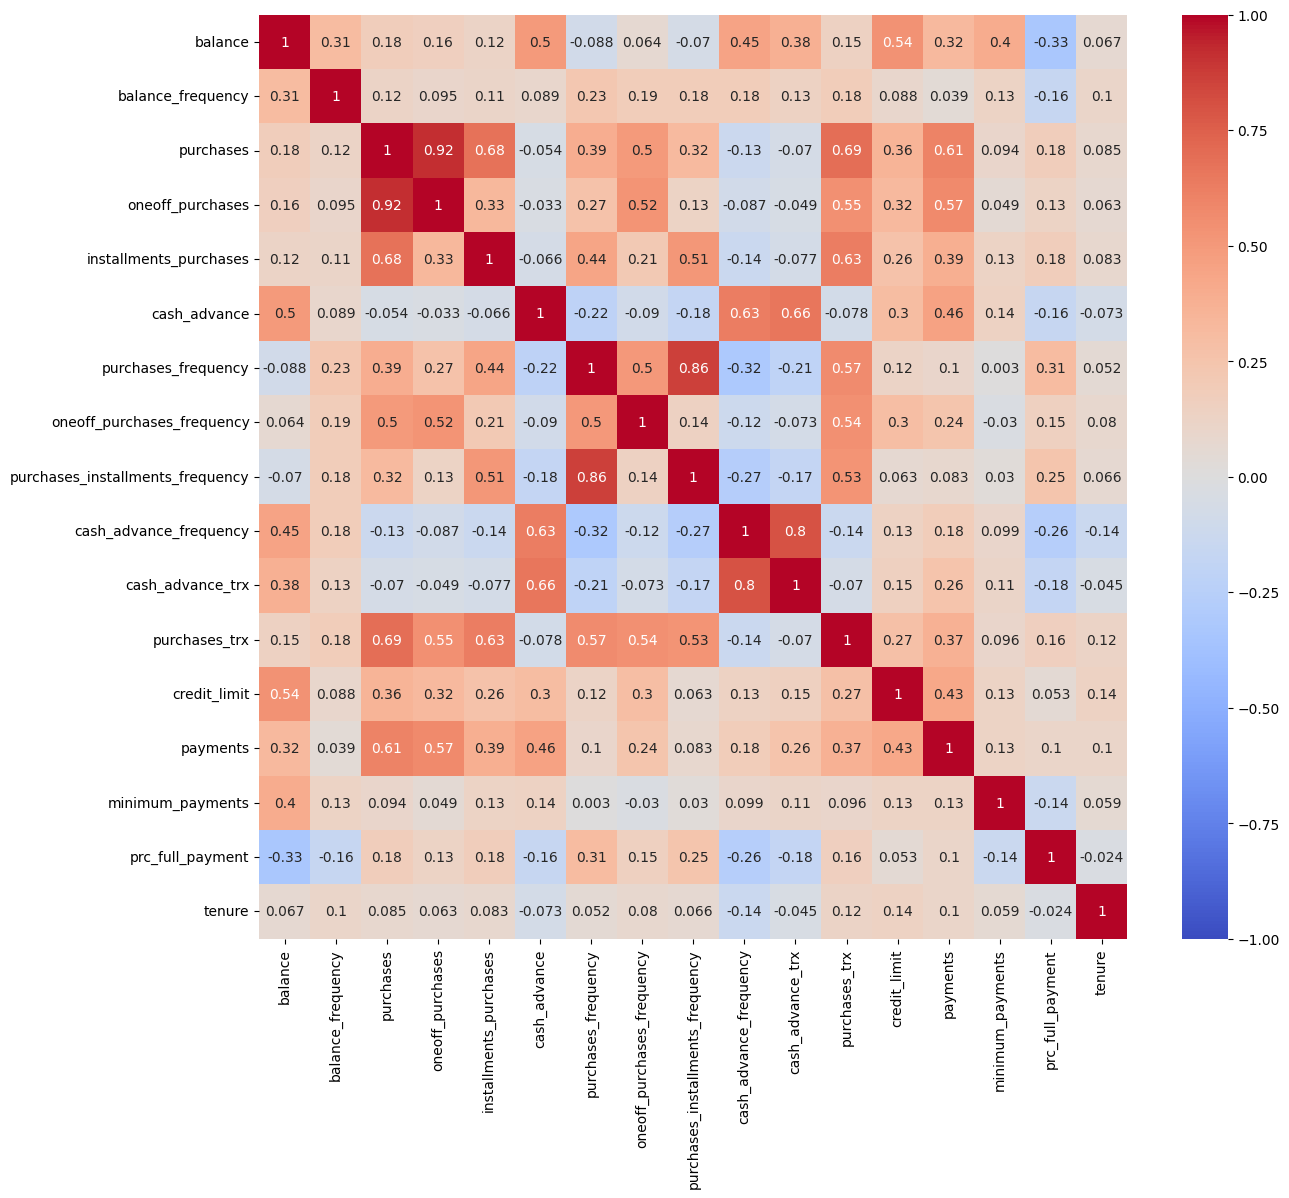

In [44]:
# Correlation Matrix to see potential correlations with each other

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, vmin =-1, vmax =1, cmap='coolwarm')
plt.show()

It seems multiple varaibles are moderately to highly correlated with each other. Dimensionality reduction or PCA may be effective in reducing complexity and redundance within our dataset.

Things to explore about the dataset.

We can observe correlation between:

Purchases
- One-Off purchases (Almost perfectly correlated)
    - May be due to multiple cardholders only making one purchase throughout the entire 6 months
- Installments_Purchases
    - There may be cardholders who's only made one purchase and it is also an installment purchase as well
- Purchase Installments Frequency
- PurchaseTrx


Frequency Variables
- Find out how many purchases allow the classification of a cardholder having a frequency score of 1
- Anything involving both # of transactions/ frequency of transactions and the actual frequency value are highly correlated with each other

Purchase Frequency
- Purchasetrx and purchase frequency is highly correlated

In [45]:
df['balance'].describe()

count     8636.000000
mean      1601.224893
std       2095.571300
min          0.000000
25%        148.095189
50%        916.855459
75%       2105.195853
max      19043.138560
Name: balance, dtype: float64

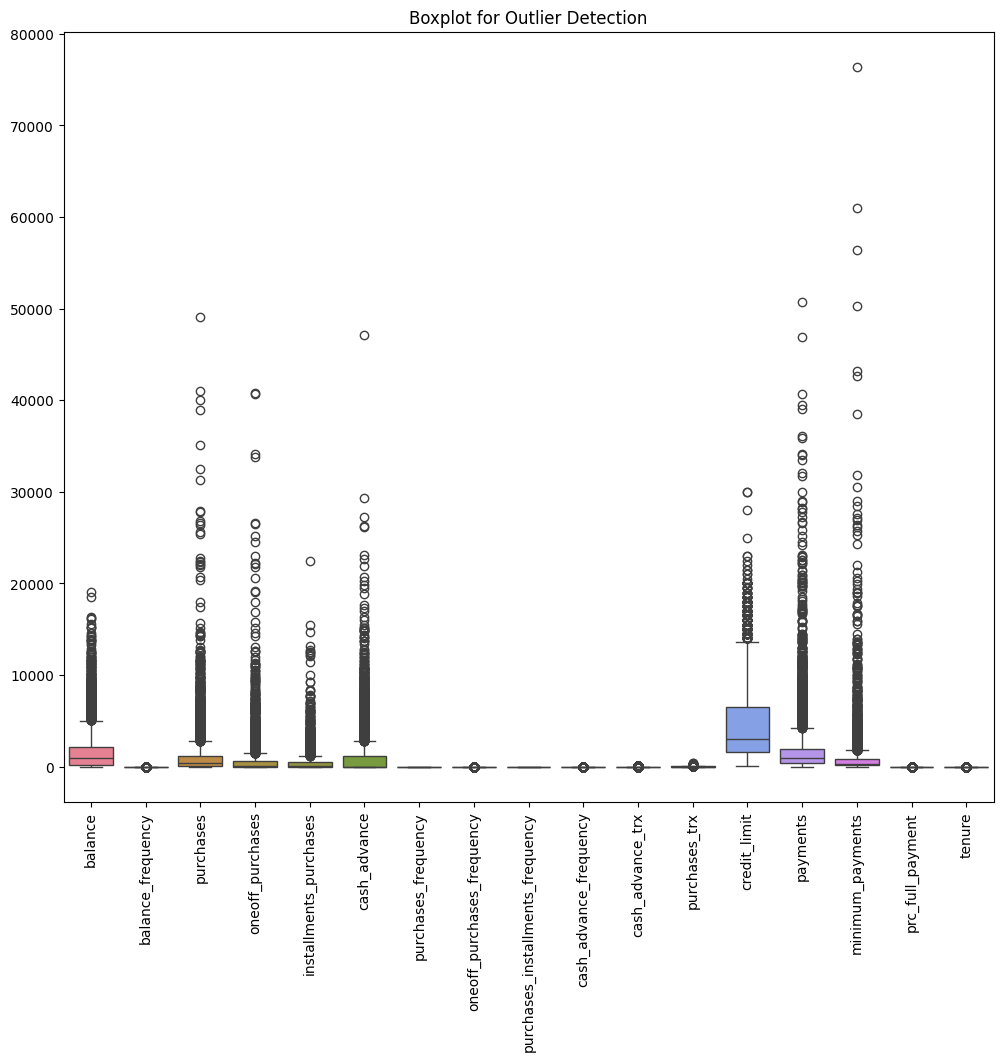

In [46]:
plt.figure(figsize=(12, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

In [47]:
df[df['minimum_payments'] > 35000]

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
567,3457.086184,1.0,2448.60,0.0,2448.60,0.000000,1.0,0.0,1.0,0.000000,0,12,1700.0,227.514473,38512.12477,0.0,12
4376,10571.411070,1.0,7739.48,0.0,7739.48,0.000000,1.0,0.0,1.0,0.000000,0,44,8000.0,2688.447014,76406.20752,0.0,12
4462,4976.028578,1.0,900.87,0.0,900.87,0.000000,1.0,0.0,1.0,0.000000,0,162,5500.0,92.865469,50260.75947,0.0,12
5657,4628.109931,1.0,912.54,0.0,912.54,0.000000,1.0,0.0,1.0,0.000000,0,21,5000.0,3746.305759,56370.04117,0.0,12
5830,8038.893195,1.0,0.00,0.0,0.00,197.915586,0.0,0.0,0.0,0.166667,8,0,9000.0,3569.182969,43132.72823,0.0,12
5968,6022.224462,1.0,0.00,0.0,0.00,4111.465632,0.0,0.0,0.0,0.166667,6,0,7000.0,4560.775720,42629.55117,0.0,12
7132,9024.812044,1.0,0.00,0.0,0.00,2750.442399,0.0,0.0,0.0,0.083333,2,0,9000.0,302.484224,61031.61860,0.0,12


Winsorization

In [48]:
# Create a copy of the original DataFrame to keep all columns
df_winsorized = df.copy()

# Apply winsorization (clipping) to specific columns
df_winsorized['purchases'] = np.clip(df['purchases'], None, 10000)
df_winsorized['balance'] = np.clip(df['balance'], None, 15000)
df_winsorized['cash_advance'] = np.clip(df['cash_advance'], None, 25000)
df_winsorized['payments'] = np.clip(df['payments'], None, 30000)
df_winsorized['minimum_payments'] = np.clip(df['minimum_payments'], None, 35000)

# Remove rows with null values
df_winsorized = df_winsorized.dropna()

# Verify the changes by displaying a few rows
print(f"Shape after removing null rows: {df_winsorized.shape}")
df_winsorized.head()

Shape after removing null rows: (8636, 17)


,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


Dropping Features to reduce high dimensionality issues

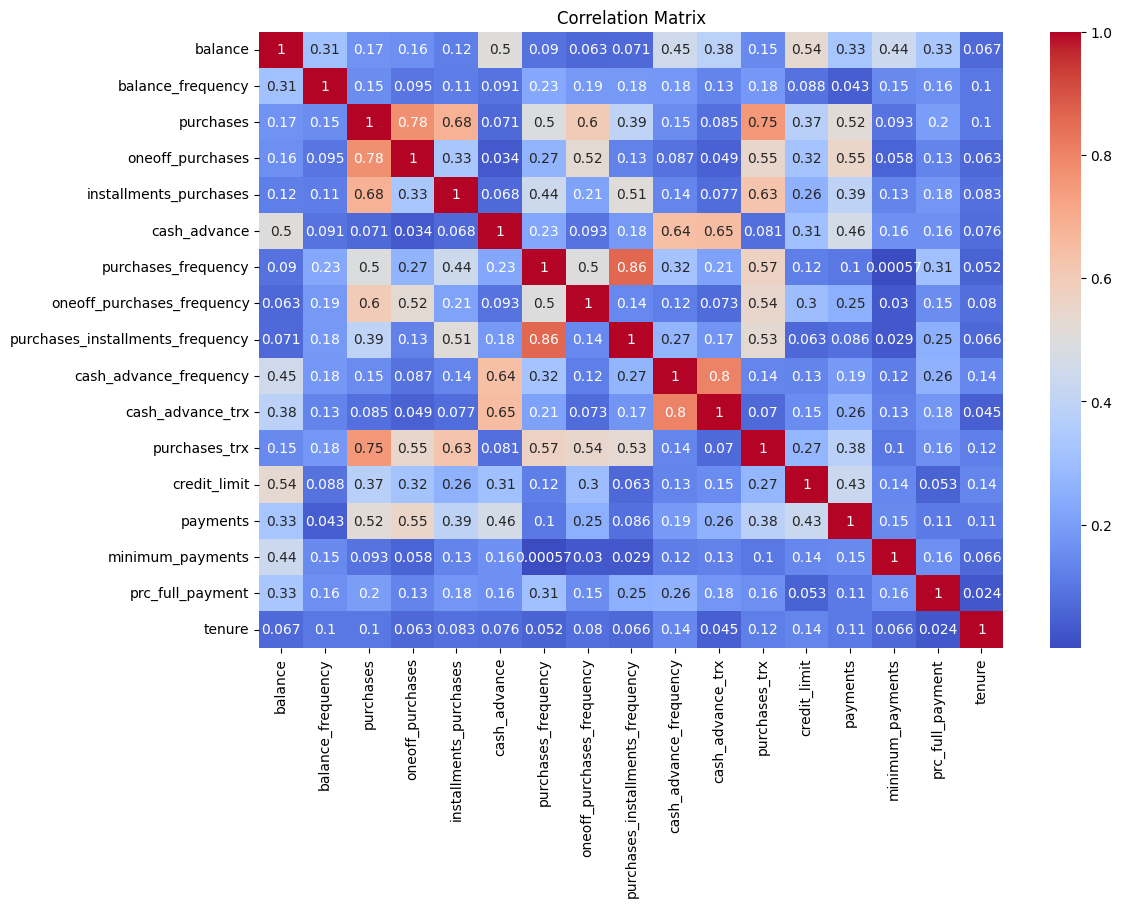

                              level_0                           level_1  \
82                purchases_frequency  purchases_installments_frequency   
108            cash_advance_frequency                  cash_advance_trx   
31                          purchases                  oneoff_purchases   
39                          purchases                     purchases_trx   
32                          purchases            installments_purchases   
..                                ...                               ...   
46                   oneoff_purchases                      cash_advance   
97         oneoff_purchases_frequency                  minimum_payments   
105  purchases_installments_frequency                  minimum_payments   
135                  prc_full_payment                            tenure   
88                purchases_frequency                  minimum_payments   

     correlation  
82      0.862338  
108     0.801260  
31      0.775399  
39      0.751884  
32  

In [49]:
# Calculate the correlation matrix
corr_matrix = df_winsorized.corr().abs()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Extract the upper triangle of the correlation matrix without the diagonal
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Create a list of correlation pairs sorted by absolute correlation, from highest to lowest
sorted_corr_pairs = (
    upper_triangle.stack()
    .reset_index()
    .rename(columns={0: 'correlation'})
    .sort_values(by='correlation', ascending=False)
)

print(sorted_corr_pairs)

In [50]:
# Drop the specified columns from the dataset
df_winsorized = df_winsorized.drop(['purchases_installments_frequency', 'cash_advance_trx', 'oneoff_purchases',
                                    'purchases_trx', 'tenure'], axis=1)

# Verify the changes by displaying the new shape and a few rows
print(f"Shape after dropping columns: {df_winsorized.shape}")
df_winsorized.head()

Shape after dropping columns: (8636, 12)


,balance,balance_frequency,purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,cash_advance_frequency,credit_limit,payments,minimum_payments,prc_full_payment
0,40.900749,0.818182,95.40,95.40,0.000000,0.166667,0.000000,0.00,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,6442.945483,0.000000,0.000000,0.25,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,0.00,0.000000,1.000000,1.000000,0.00,7500.0,622.066742,627.284787,0.000000
4,817.714335,1.000000,16.00,0.00,0.000000,0.083333,0.083333,0.00,1200.0,678.334763,244.791237,0.000000
5,1809.828751,1.000000,1333.28,1333.28,0.000000,0.666667,0.000000,0.00,1800.0,1400.057770,2407.246035,0.000000


---

## Part 2 - Exploratory Data Analysis

Looking to discover the types of outliers and potential credit card customer behaviours we can segment


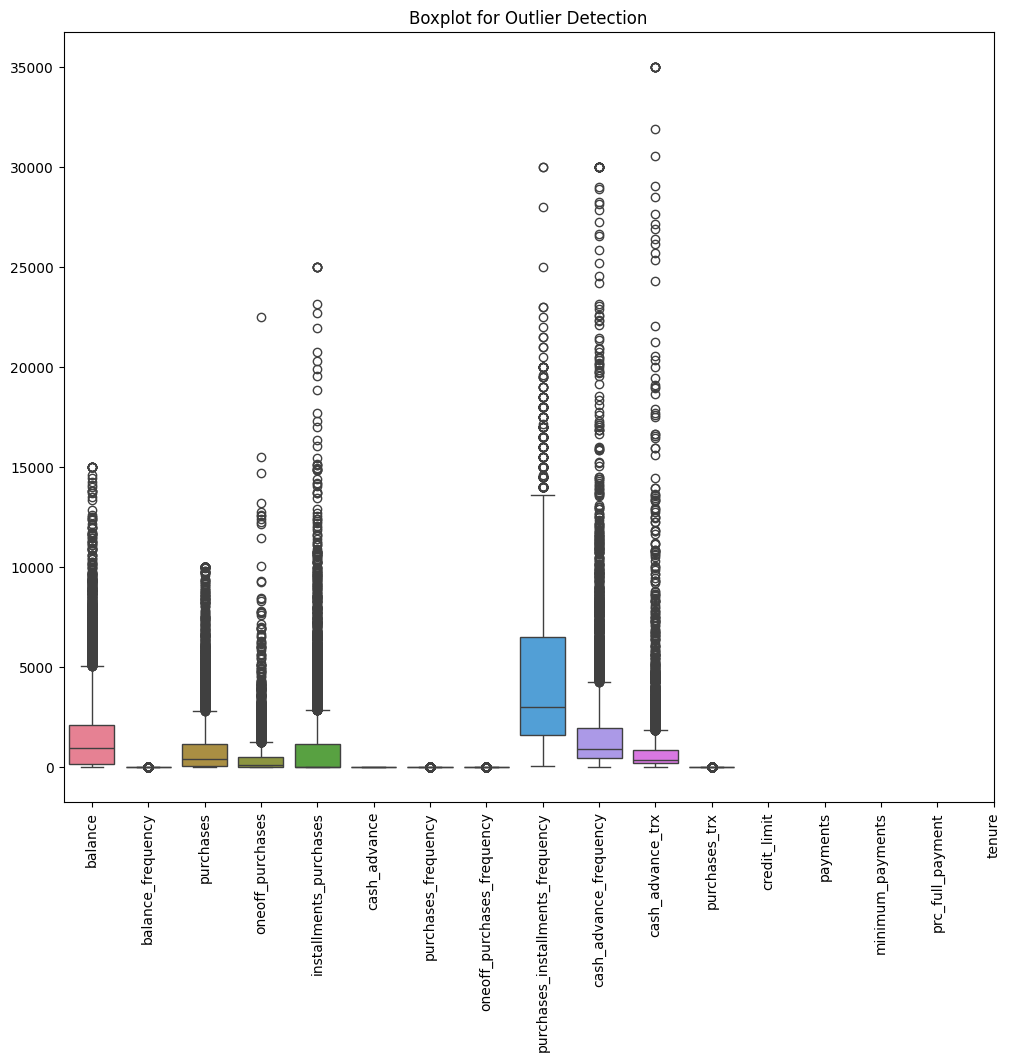

In [51]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 10))
sns.boxplot(data=df_winsorized)
plt.xticks(ticks=range(len(df.columns)), labels=df.columns, rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()

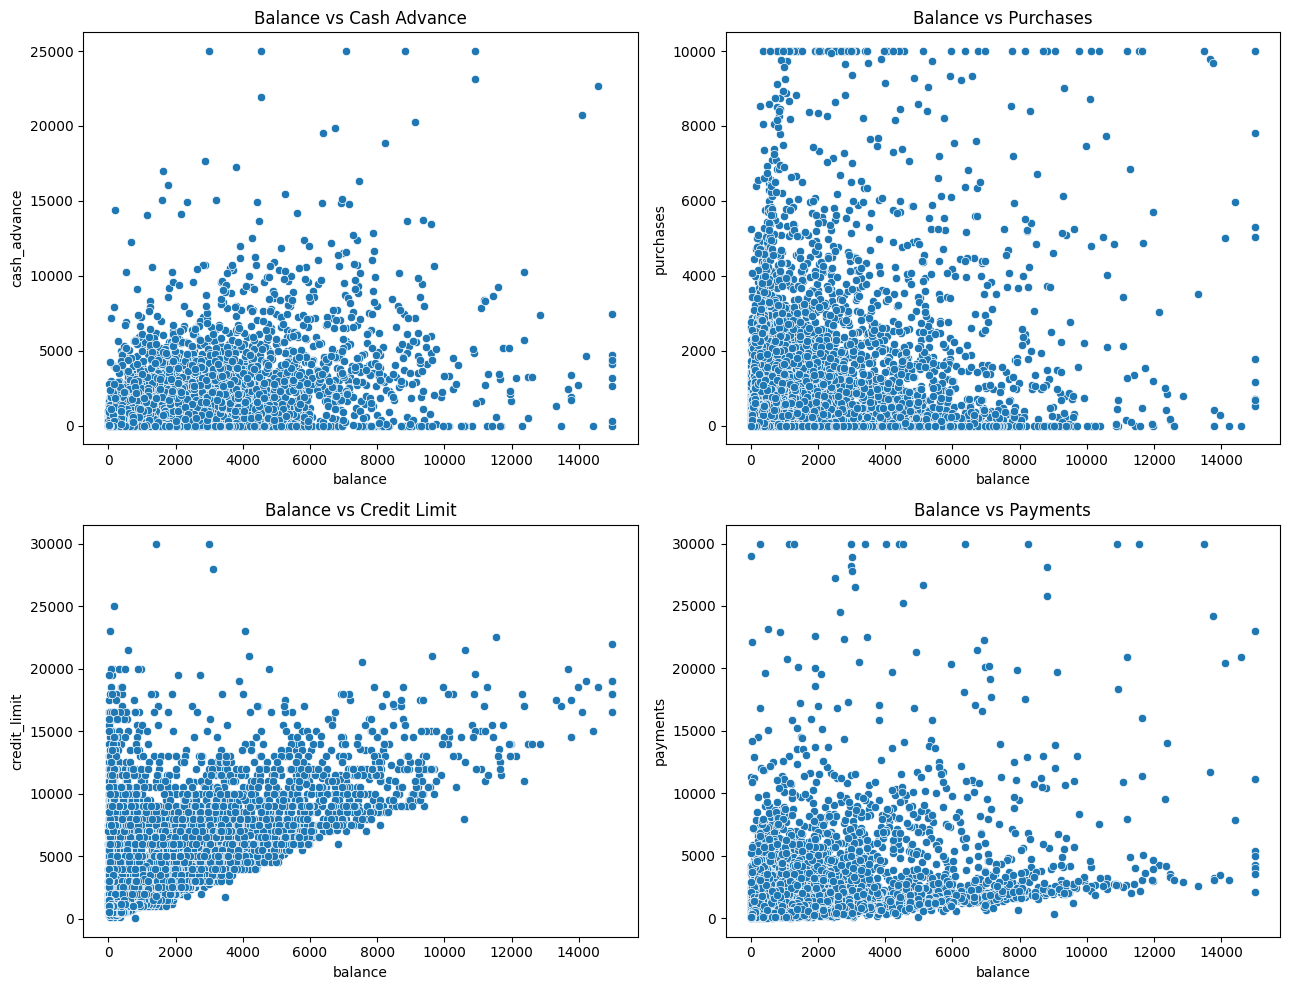

In [52]:
# Checking the relationship between balance and other variables - Outliers have been winsorized
fig, axes = plt.subplots(2, 2, figsize=(13, 10))

# Flatten the axes to make it easier to iterate
axes = axes.flatten()

sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['cash_advance'], ax=axes[0])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['purchases'], ax=axes[1])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['credit_limit'], ax=axes[2])
sns.scatterplot(x=df_winsorized['balance'], y=df_winsorized['payments'], ax=axes[3])

# Titles for each subplot
axes[0].set_title("Balance vs Cash Advance")
axes[1].set_title("Balance vs Purchases")
axes[2].set_title("Balance vs Credit Limit")
axes[3].set_title("Balance vs Payments")

plt.tight_layout()
plt.show()

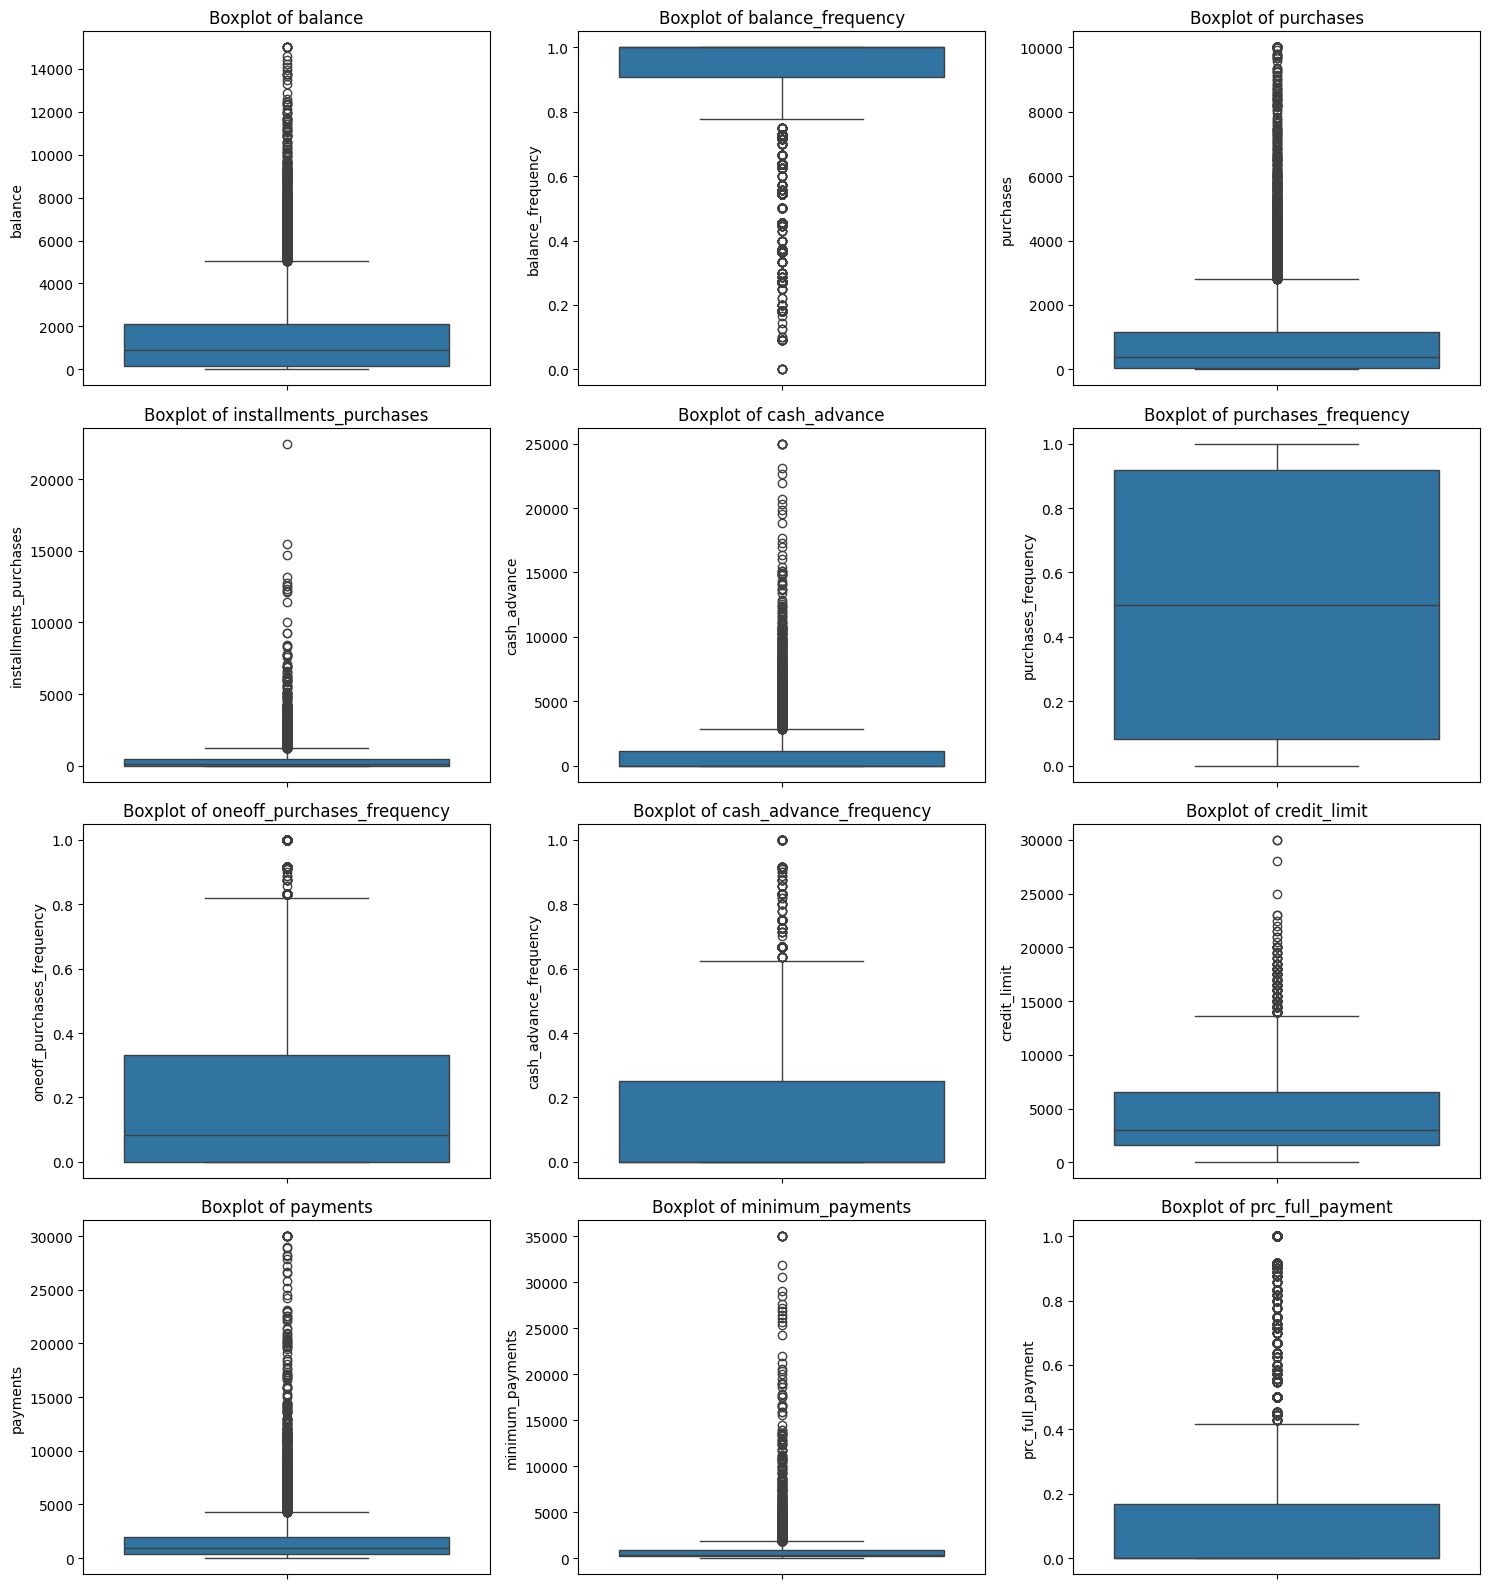

In [53]:
# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a boxplot for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.boxplot(data=df_winsorized[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

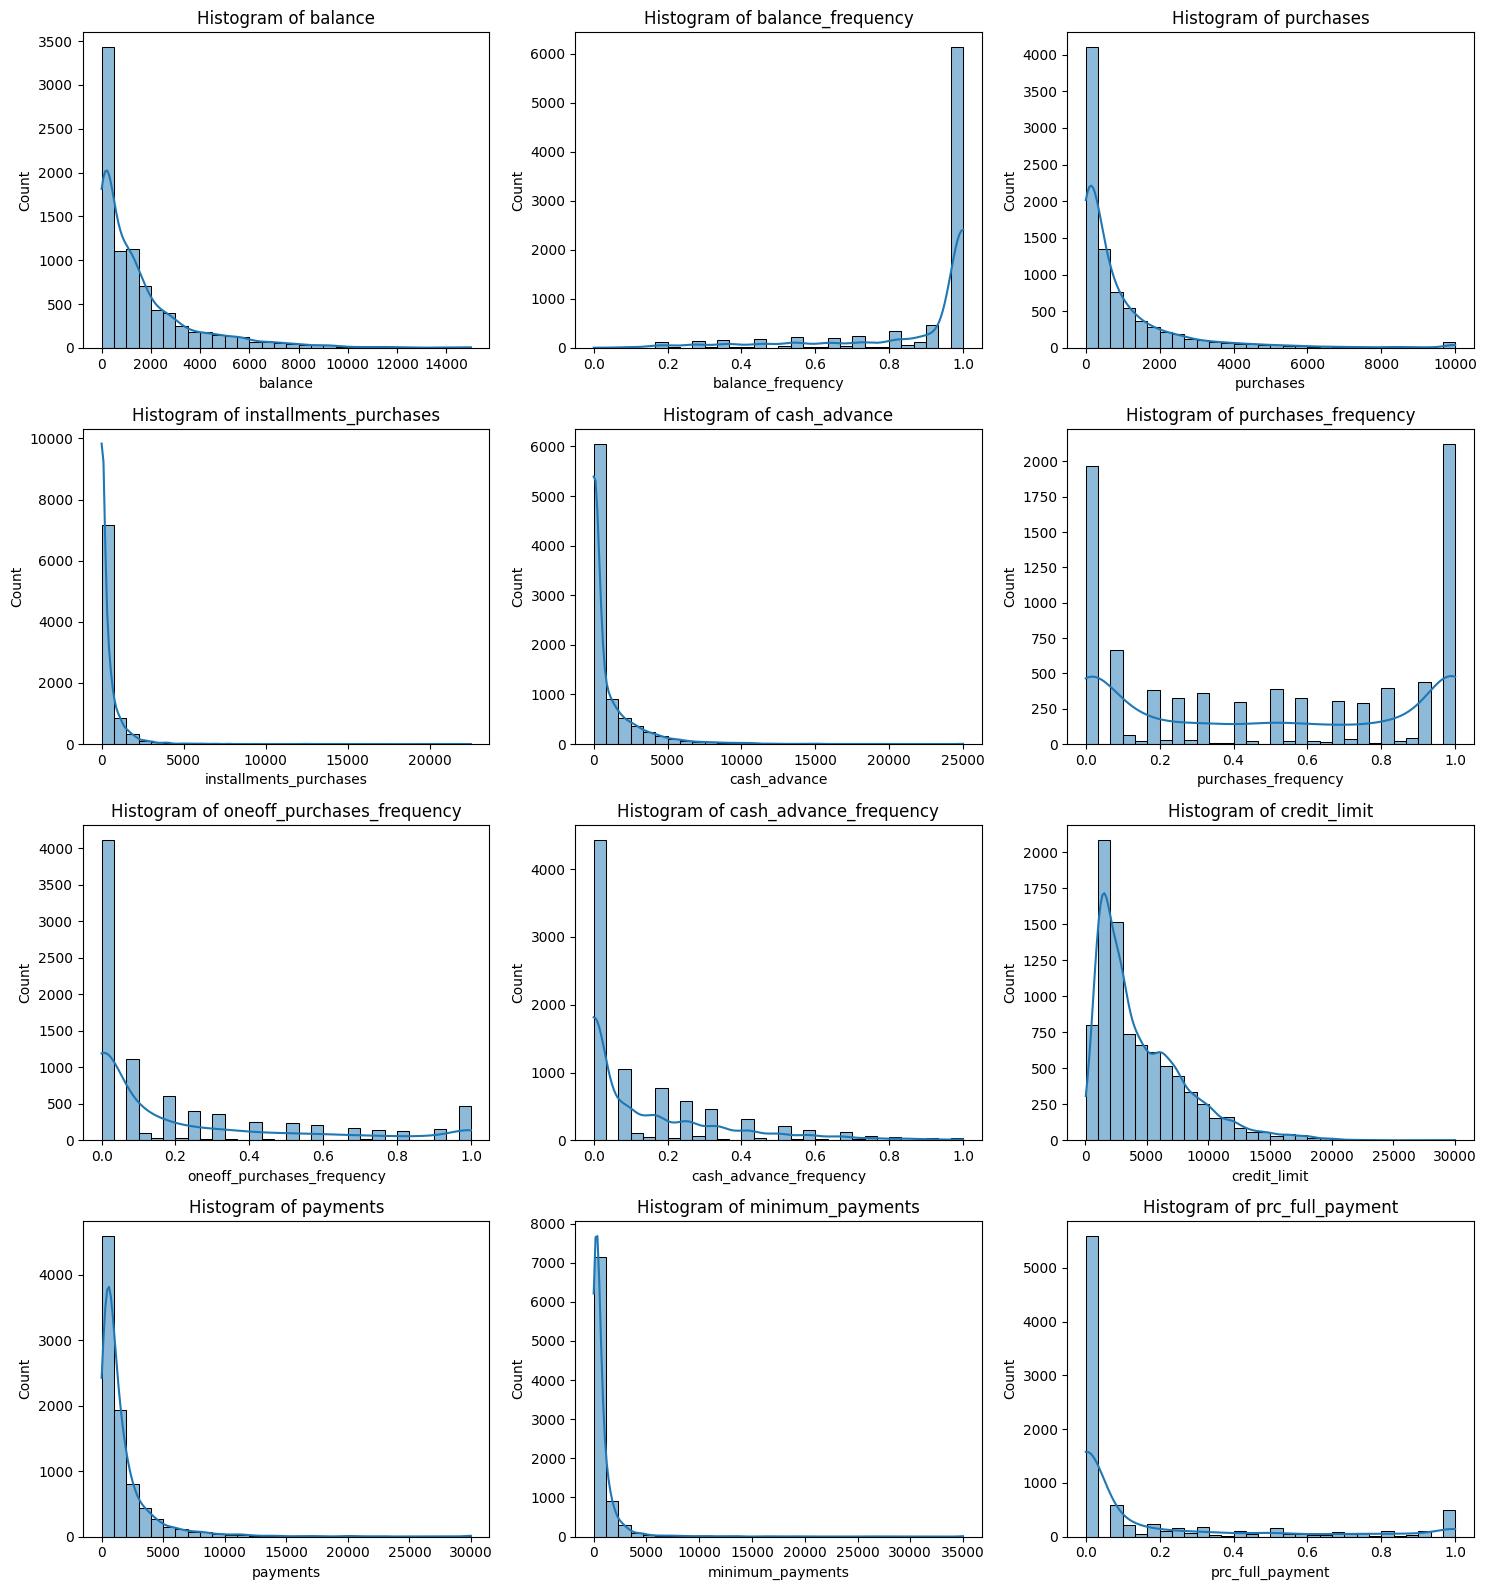

In [54]:
# Determine the number of features and set up the plot grid
num_features = len(df_winsorized.columns)
num_cols = 3  # Number of columns for the grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))

# Flatten axes for easy iteration, in case it's a 2D array
axes = axes.flatten()

# Create a histogram for each feature
for i, col in enumerate(df_winsorized.columns):
    sns.histplot(df_winsorized[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {col}")

# Hide any remaining empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---

## PART 3 - CLUSTERING ALGORITHMS

- Implement at least three different clustering algorithms of your choice (e.g., K-Means, Hierarchical, DBSCAN). You can try any algorithms available in sklearn.
- Use Elbow method, Silhouette analysis, or other techniques to determine the optimal number of clusters.
- Discuss each method, and select the most appropriate

Scalers

In [55]:
minmax_scaler = MinMaxScaler()
minmax_df = minmax_scaler.fit_transform(df_winsorized)

standard_scaler = StandardScaler()
standard_df = standard_scaler.fit_transform(df_winsorized)

robust_scaler = RobustScaler()
robust_df = robust_scaler.fit_transform(df_winsorized)

PCA

In [56]:
# Function to apply PCA and retain 85% variance
def apply_pca(data, variance_ratio=0.85):
    pca = PCA(n_components=variance_ratio) 
    pca_data = pca.fit_transform(data)
    explained_variance = pca.explained_variance_ratio_.cumsum()
    
    print(f"Number of components to retain {variance_ratio*100}% variance: {pca.n_components_}")
    print(f"Explained variance ratio: {explained_variance[-1]}")
    
    return pca_data, pca

# Apply PCA to each of the scaled datasets
minmax_pca_data, minmax_pca = apply_pca(minmax_df, 0.85)
standard_pca_data, standard_pca = apply_pca(standard_df, 0.85)
robust_pca_data, robust_pca = apply_pca(robust_df, 0.85)

Number of components to retain 85.0% variance: 5
Explained variance ratio: 0.9005490754562362
Number of components to retain 85.0% variance: 7
Explained variance ratio: 0.8715971002808849
Number of components to retain 85.0% variance: 5
Explained variance ratio: 0.8859164246366152


---

K-MEANS: OPTIMIZATION

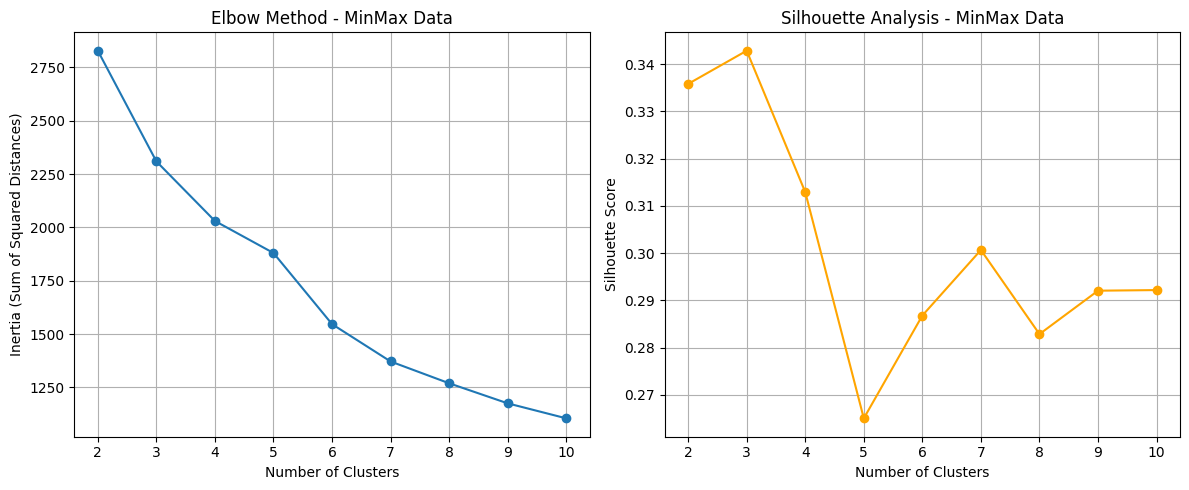

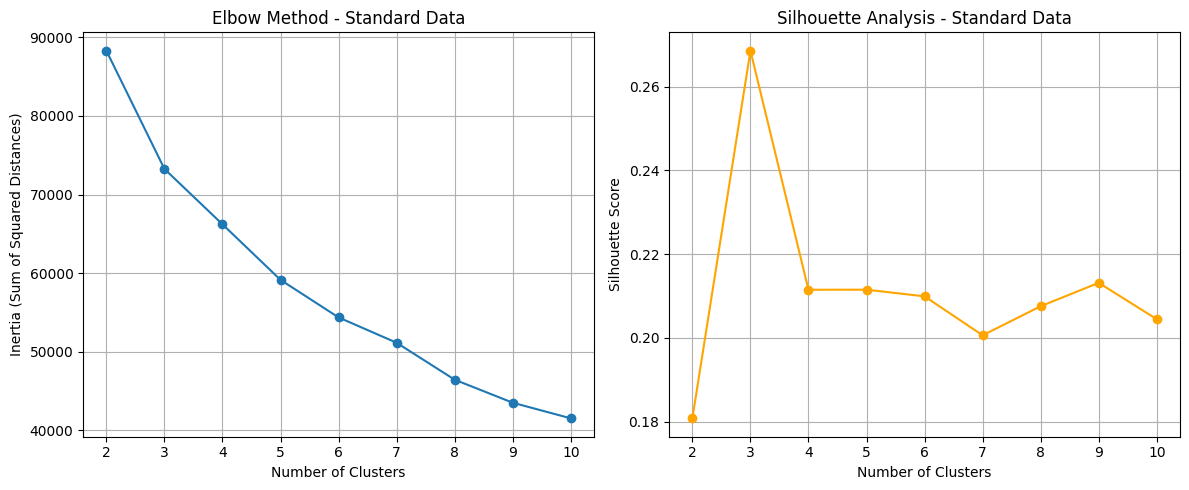

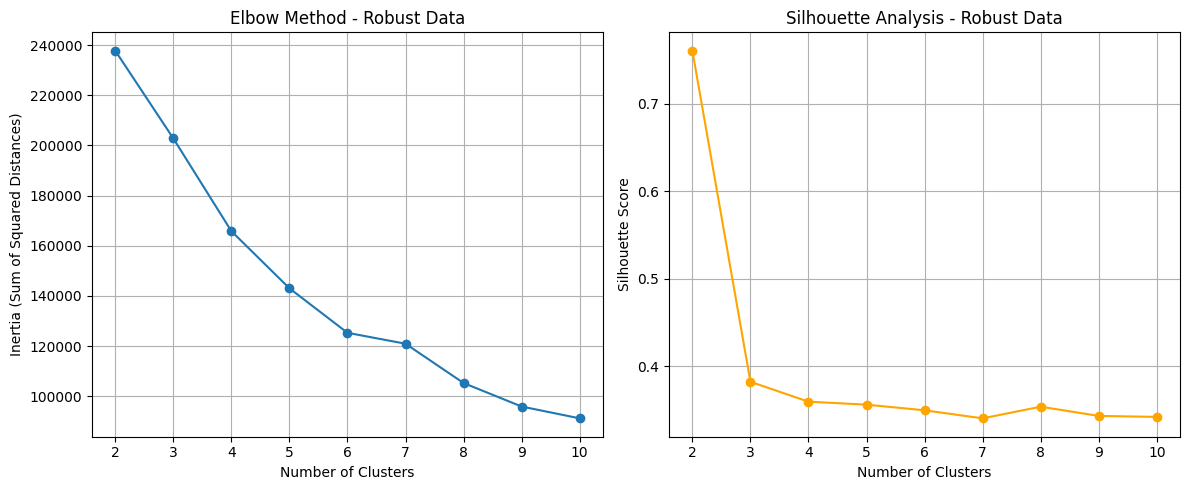

In [57]:
# Define a function to run the Elbow Method and Silhouette Analysis for a given dataset
def elbow_silhouette_analysis(scaled_data, title):
    # Range of clusters to evaluate
    range_n_clusters = range(2, 11)
    
    # Lists to store the results
    inertia = []  # For Elbow Method
    silhouette_scores = []  # For Silhouette Analysis
    
    # Loop over the range of cluster numbers
    for n_clusters in range_n_clusters:
        # Initialize KMeans model
        kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        kmeans.fit(scaled_data)
        
        # Elbow method: store inertia
        inertia.append(kmeans.inertia_)
        
        # Silhouette analysis: calculate silhouette score
        cluster_labels = kmeans.labels_
        silhouette_avg = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot Elbow Method
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range_n_clusters, inertia, marker='o')
    plt.title(f"Elbow Method - {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia (Sum of Squared Distances)")
    plt.grid(True)
    
    # Plot Silhouette Analysis
    plt.subplot(1, 2, 2)
    plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
    plt.title(f"Silhouette Analysis - {title}")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    
    # Adjust layout and display plots
    plt.tight_layout()
    plt.show()

# Run the analysis for each PCA-transformed dataset
elbow_silhouette_analysis(minmax_df, "MinMax Data")
elbow_silhouette_analysis(standard_df, "Standard Data")
elbow_silhouette_analysis(robust_df, "Robust Data")

K-MEANS MODEL
- note that only the robust data was used to visualize as it the highest silhouette score.
- The robust data was visualized using the number of clusters where the elbow bends the sharpest (6) and where the silhouette score is highest (2)

Robust Data - Where Elbow Bends - Optimal Clusters: 5
Cluster Centers:
[[ 2.18524057e+00 -3.53480526e-01  4.24679682e-01  5.07681625e-01
   4.51623396e+00 -1.57799686e-01  2.47114618e-01  1.69805004e+00
   1.07564782e+00  2.38564042e+00  2.88672064e+00  2.35430035e-01]
 [ 2.39283753e-01 -2.80432829e-01  1.54691676e-01  2.53021028e-01
   5.16441717e-01 -5.61269273e-02  2.63586118e-01  5.42262889e-01
   1.03353587e-01  6.15012630e-02  4.20444829e-01  2.85686317e-01]
 [ 1.93642235e+00 -1.48148148e-01  1.22769965e+00  2.69489562e+00
   1.07132690e+00  2.55891647e-02  2.27281709e-02  4.53797037e-01
   4.77072310e-01  1.55699200e+00  2.66802393e+01  8.02466543e-02]
 [ 6.85873410e-02 -3.58953942e-01  2.49250596e+00  2.73517459e+00
   1.30914641e-01  5.08315365e-01  1.21641128e+00  1.05592358e-01
   6.85301446e-01  1.49684115e+00  2.87268240e-01  3.38487473e+00]
 [-3.84337207e-01 -6.09169717e+00  4.84812735e-03  1.46802988e-01
   3.61190687e-01 -2.32840280e-01 -6.56621349e-03  2.03469917e-01
 

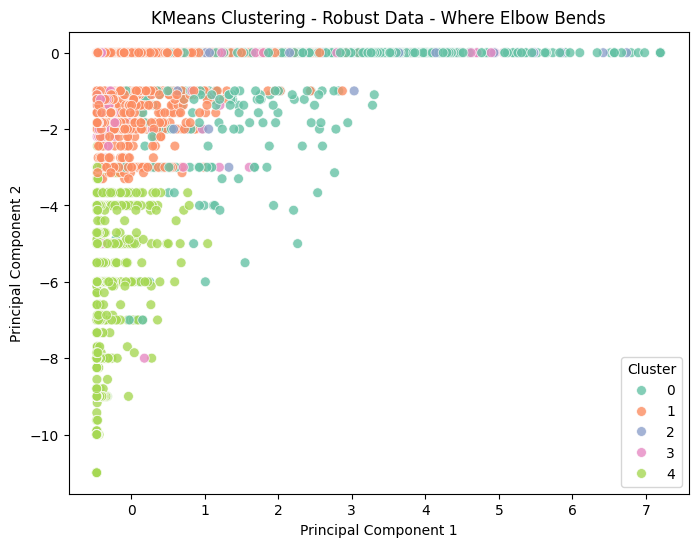

In [58]:
optimal_clusters_robust = 5  

# Function to run KMeans for a dataset and the specified number of clusters
def build_kmeans_model(scaled_data, n_clusters, title):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Add the cluster labels to the DataFrame for analysis
    df_with_clusters = pd.DataFrame(scaled_data, columns=[f"PC_{i+1}" for i in range(scaled_data.shape[1])])
    df_with_clusters['Cluster'] = cluster_labels
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    
    # Print basic information
    print(f"{title} - Optimal Clusters: {n_clusters}")
    print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
    print(f"Inertia: {kmeans.inertia_}")
    print(f"Silhouette Score: {silhouette_avg:.3f}\n")
    
    # Visualize the clusters using a scatter plot (using the first 2 PCs)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_with_clusters["PC_1"], y=df_with_clusters["PC_2"], hue=cluster_labels, palette="Set2", s=50, alpha=0.8)
    plt.title(f"KMeans Clustering - {title}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster')
    plt.show()
    
    return df_with_clusters, kmeans

# Build KMeans models for each PCA-transformed dataset
robust_kmeans_clusters, robust_kmeans = build_kmeans_model(robust_df, optimal_clusters_robust, "Robust Data - Where Elbow Bends")

Robust Data - Highest Silhouette Score - Optimal Clusters: 2
Cluster Centers:
[[ 2.03648256e+00 -1.37731481e-01  1.43888086e+00  2.86597017e+00
   1.16173684e+00  4.24241786e-02  4.78229228e-02  4.98632042e-01
   5.11585884e-01  1.60373318e+00  2.45398931e+01  6.77081146e-02]
 [ 3.29981221e-01 -1.16604594e+00  5.24978328e-01  6.48823035e-01
   8.71533755e-01 -5.33085311e-03  3.71323708e-01  5.50276646e-01
   3.08371843e-01  5.60582088e-01  5.52399992e-01  9.65803295e-01]]
Inertia: 237773.0237726327
Silhouette Score: 0.761



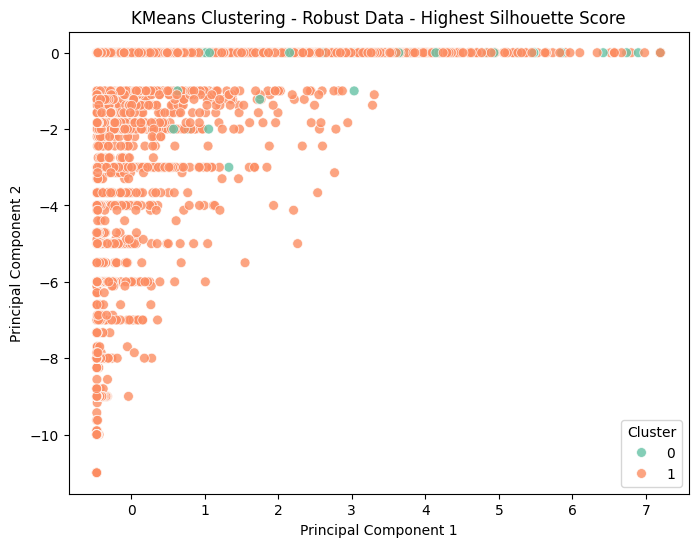

In [59]:
optimal_clusters_robust = 2  

# Function to run KMeans for a dataset and the specified number of clusters
def build_kmeans_model(scaled_data, n_clusters, title):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    
    # Add the cluster labels to the DataFrame for analysis
    df_with_clusters = pd.DataFrame(scaled_data, columns=[f"PC_{i+1}" for i in range(scaled_data.shape[1])])
    df_with_clusters['Cluster'] = cluster_labels
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    
    # Print basic information
    print(f"{title} - Optimal Clusters: {n_clusters}")
    print(f"Cluster Centers:\n{kmeans.cluster_centers_}")
    print(f"Inertia: {kmeans.inertia_}")
    print(f"Silhouette Score: {silhouette_avg:.3f}\n")
    
    # Visualize the clusters using a scatter plot (using the first 2 PCs)
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df_with_clusters["PC_1"], y=df_with_clusters["PC_2"], hue=cluster_labels, palette="Set2", s=50, alpha=0.8)
    plt.title(f"KMeans Clustering - {title}")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster')
    plt.show()
    
    return df_with_clusters, kmeans

# Build KMeans models for each PCA-transformed dataset
robust_kmeans_clusters, robust_kmeans = build_kmeans_model(robust_df, optimal_clusters_robust, "Robust Data - Highest Silhouette Score")

The K-Means scored reasonably high when there was 2 clusters but there is not enough separation between them to articulate a strongly supported business recommendation.

---

DBSCAN OPTIMIZATION

In [88]:
def optimize_dbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for eps and min_samples
    eps_values = np.arange(0.1, 3.0, 0.1)
    min_samples_values = range(3, 10)
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax": minmax_df,
        "Standard": standard_df,
        "Robust": robust_df
    }
    
    # Variables to track the best overall configuration
    best_title = None
    best_eps = None
    best_min_samples = None
    best_score = -1
    best_scaled_data = None
    
    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        # Local variables to find the best for each dataset
        best_eps_for_dataset = None
        best_min_samples_for_dataset = None
        best_score_for_dataset = -1
        
        # Iterate over combinations of eps and min_samples
        for eps in eps_values:
            for min_samples in min_samples_values:
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                labels = dbscan.fit_predict(scaled_data)
                
                # Only consider configurations that produce more than 1 valid cluster
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                if n_clusters > 1:
                    score = silhouette_score(scaled_data, labels)
                    if score > best_score_for_dataset:
                        best_eps_for_dataset = eps
                        best_min_samples_for_dataset = min_samples
                        best_score_for_dataset = score
        
        # Print the best configuration for this dataset
        if best_eps_for_dataset is not None:
            print(f"{title} - Best eps: {best_eps_for_dataset}, Best min_samples: {best_min_samples_for_dataset}, Silhouette Score: {best_score_for_dataset}")
        
        # Update the best overall if this dataset's result is better
        if best_score_for_dataset > best_score:
            best_title = title
            best_eps = best_eps_for_dataset
            best_min_samples = best_min_samples_for_dataset
            best_score = best_score_for_dataset
            best_scaled_data = datasets[best_title]

    # Return the best configuration across all datasets, including the dataset name
    if best_scaled_data is not None:
        print(f"Best overall configuration: {best_title} - eps: {best_eps}, min_samples: {best_min_samples}, Silhouette Score: {best_score}")
    else:
        print("No valid configurations found across the datasets.")
        
    return best_scaled_data, best_eps, best_min_samples, best_score, best_title

DBSCAN MODEL
- note that only the robust scaled data will be modeled as it performed the best

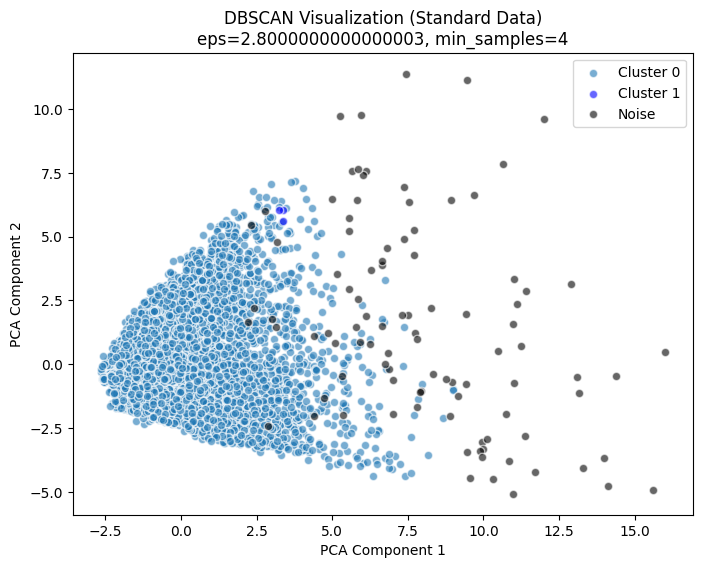

Clusters: 2, Noise Points: 97


In [85]:
def visualize_best_dbscan_result(best_data, best_eps, best_min_samples, scaled_data_type):
    # Fit DBSCAN with the best parameters
    dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
    labels = dbscan.fit_predict(best_data)
    
    # Count clusters and noise
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    
    # Reduce dimensions for visualization using PCA
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(best_data)
    
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    unique_labels = set(labels)
    
    # Generate distinct colors for clusters
    colors = plt.cm.get_cmap("tab10", len(unique_labels))
    
    # Adjust colors for Cluster 1 and Noise for more distinction
    color_map = {1: 'blue', -1: 'black'}  # Make cluster 1 blue, noise black
    for label in unique_labels:
        # Use predefined color for specific clusters or a distinct color from the colormap
        color = color_map.get(label, colors(label % colors.N))
        plt.scatter(pca_data[labels == label, 0], pca_data[labels == label, 1], 
                    c=[color], label=f'Cluster {label}' if label != -1 else 'Noise', alpha=0.6, edgecolors='w')
    
    # Add title and axis labels
    plt.title(f'DBSCAN Visualization ({scaled_data_type} Data)\neps={best_eps}, min_samples={best_min_samples}')
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.legend()
    
    # Show the plot
    plt.show()
    
    # Print cluster and noise information separately
    print(f"Clusters: {n_clusters}, Noise Points: {n_noise}")

# Example call with the scaled data type included
visualize_best_dbscan_result(best_data, best_eps, best_min_samples, "Standard")

---

HDBSCAN Optimization

In [68]:
# Function to optimize HDBSCAN parameters for the PCA-transformed dataframes
def optimize_hdbscan_all(minmax_df, standard_df, robust_df):
    # Define ranges for min_cluster_size and min_samples
    min_cluster_size_values = range(5, 20, 2)
    min_samples_values = range(3, 10)

    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax Data": minmax_df,
        "Standard Data": standard_df,
        "Robust Data": robust_df
    }

    # Iterate over each dataset
    for title, scaled_data in datasets.items():
        best_min_cluster_size = None
        best_min_samples = None
        best_score = -1 
        
        # Iterate over combinations of min_cluster_size and min_samples
        for min_cluster_size in min_cluster_size_values:
            for min_samples in min_samples_values:
                clusterer = hdbscan.HDBSCAN(
                    min_cluster_size=min_cluster_size, 
                    min_samples=min_samples,
                    cluster_selection_method='eom'
                )
                
                labels = clusterer.fit_predict(scaled_data)
                
                # Only consider configurations that produce more than 1 valid cluster
                n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
                if n_clusters > 1:
                    score = silhouette_score(scaled_data, labels)
                    if score > best_score:
                        best_min_cluster_size = min_cluster_size
                        best_min_samples = min_samples
                        best_score = score

        print(f"{title} - Best min_cluster_size: {best_min_cluster_size}, Best min_samples: {best_min_samples}, Silhouette Score: {best_score}")

# Use the function to process all three PCA-transformed datasets
optimize_hdbscan_all(minmax_df, standard_df, robust_df)

MinMax Data - Best min_cluster_size: 19, Best min_samples: 3, Silhouette Score: -0.34775697950322226
Standard Data - Best min_cluster_size: 9, Best min_samples: 3, Silhouette Score: 0.6061877913293756
Robust Data - Best min_cluster_size: 9, Best min_samples: 3, Silhouette Score: 0.752545187736821


HDBSCAN Model

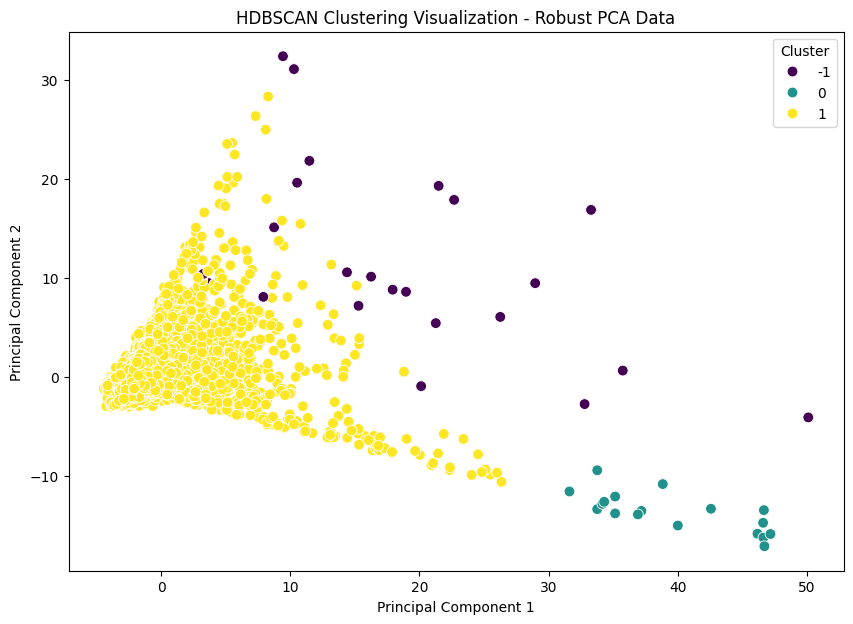

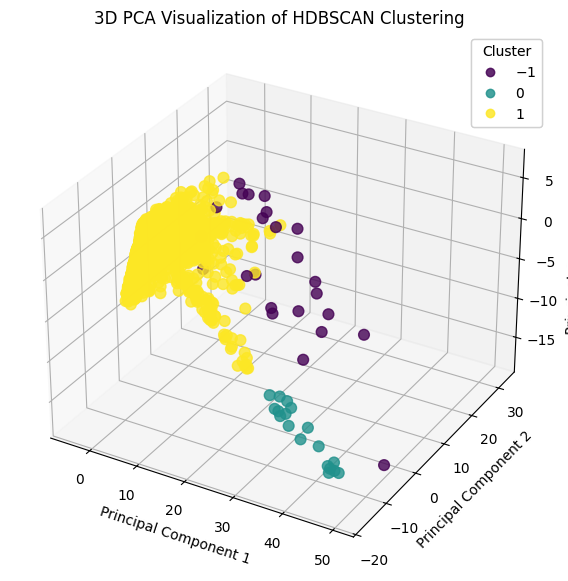

Estimated number of clusters: 2
Estimated number of noise points: 24
Silhouette Score: 0.805


In [178]:
# Initialize HDBSCAN with specified parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=3, cluster_selection_method='eom')

# Fit HDBSCAN on the PCA-transformed data
hdbscan_labels = clusterer.fit_predict(robust_pca_data)

# Visualize the HDBSCAN clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(x=robust_pca_data[:, 0], y=robust_pca_data[:, 1], hue=hdbscan_labels, palette='viridis', s=60)
plt.title("HDBSCAN Clustering Visualization - Robust PCA Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()


# Create a 3D scatter plot of the first three PCA components
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(robust_pca_data[:, 0], robust_pca_data[:, 1], robust_pca_data[:, 2], 
                     c=hdbscan_labels, cmap='viridis', s=60, alpha=0.8)

# Labeling
ax.set_title("3D PCA Visualization of HDBSCAN Clustering")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
legend = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend)

plt.show()


# Print the number of clusters and noise points
n_clusters = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
n_noise = list(hdbscan_labels).count(-1)
print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Calculate and print silhouette score (only if there are at least 2 clusters)
if n_clusters > 1:
    score = silhouette_score(robust_pca_data, hdbscan_labels)
    print(f"Silhouette Score: {score:.3f}")
else:
    print("Silhouette Score: Not applicable (less than 2 clusters)")

note: the "-1" clusters are the noise points

---

Mean Shift Model Optimization

In [179]:
# Function to optimize MeanShift parameters for the PCA-transformed data
def optimize_meanshift_all(minmax_pca_data, standard_pca_data, robust_pca_data):
    # Define a range of bandwidth values for MeanShift
    bandwidth_values = np.arange(0.5, 2.0, 0.5)  # Adjust range and step as needed
    
    # Dictionary to hold the datasets and titles
    datasets = {
        "MinMax PCA Data": minmax_pca_data,
        "Standard PCA Data": standard_pca_data,
        "Robust PCA Data": robust_pca_data
    }
    
    # Iterate over each dataset
    for title, pca_data in datasets.items():
        best_bandwidth = None
        best_score = -1  # Start with a low score for comparison
        
        # Iterate over different bandwidth values
        for bandwidth in bandwidth_values:
            meanshift = MeanShift(bandwidth=bandwidth)
            labels = meanshift.fit_predict(pca_data)
            
            # Only consider configurations that produce more than 1 cluster
            if len(set(labels)) > 1:
                score = silhouette_score(pca_data, labels)
                if score > best_score:
                    best_bandwidth = bandwidth
                    best_score = score

        print(f"{title} - Best bandwidth: {best_bandwidth}, Silhouette Score: {best_score}")

# Use the function to process all three PCA-transformed datasets
optimize_meanshift_all(minmax_pca_data, standard_pca_data, robust_pca_data)

MinMax PCA Data - Best bandwidth: 0.5, Silhouette Score: 0.3131002710426179
Standard PCA Data - Best bandwidth: 1.5, Silhouette Score: 0.1352154653203167
Robust PCA Data - Best bandwidth: 1.5, Silhouette Score: 0.23646253291611702


Mean Shift Model

Robust PCA Data - Silhouette Score: 0.24


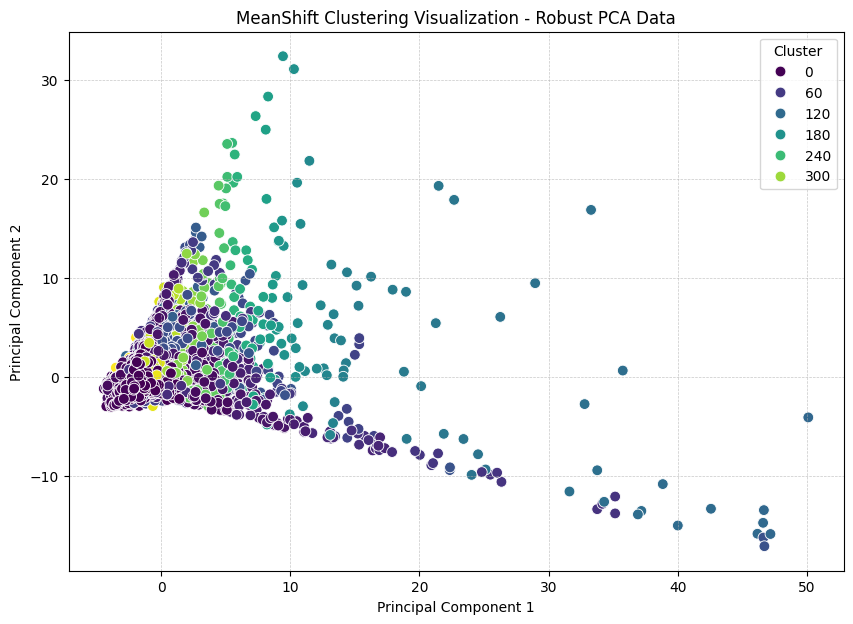

In [180]:
# Best bandwidth for Robust PCA Data (replace with your determined value)
best_bandwidth_robust = 1.5

# Build and visualize MeanShift model for Robust PCA Data
def build_meanshift_robust():
    meanshift = MeanShift(bandwidth=best_bandwidth_robust)
    robust_labels = meanshift.fit_predict(robust_pca_data)

    # Calculate silhouette score
    silhouette_avg = silhouette_score(robust_pca_data, robust_labels)
    print(f"Robust PCA Data - Silhouette Score: {silhouette_avg:.2f}")

    # Prepare DataFrame for visualization
    robust_df = pd.DataFrame(robust_pca_data, columns=[f'PC{i+1}' for i in range(robust_pca_data.shape[1])])
    robust_df['Cluster'] = robust_labels

    # Visualization
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=robust_df, palette='viridis', s=60)
    plt.title("MeanShift Clustering Visualization - Robust PCA Data")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend(title='Cluster', loc='upper right')
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    plt.show()

    return meanshift, robust_labels

# Run MeanShift for Robust PCA Data
robust_meanshift, robust_labels = build_meanshift_robust()

---

Expectation Maximization Model Optimization

In [186]:
# Function to optimize GMM parameters (number of clusters) using silhouette score
def optimize_gmm_clusters(pca_data, cluster_range, title):
    best_n_clusters = None
    best_score = -1
    best_gmm = None
    best_df_with_clusters = None

    for n_clusters in cluster_range:
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_labels = gmm.fit_predict(pca_data)
        
        # Only consider configurations with more than one cluster
        if len(np.unique(gmm_labels)) > 1:
            score = silhouette_score(pca_data, gmm_labels)
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_gmm = gmm
                best_df_with_clusters = pd.DataFrame(pca_data, columns=[f"PC_{i+1}" for i in range(pca_data.shape[1])])
                best_df_with_clusters['Cluster'] = gmm_labels

    # Return the best clustering DataFrame, GMM model, and silhouette score
    return best_df_with_clusters, best_gmm, best_score, best_n_clusters

# Optimize and show all silhouette scores
silhouette_scores = {}

# Example usage on PCA-transformed datasets
pca_datasets = {
    "MinMax PCA Data": minmax_pca_data,
    "Standard PCA Data": standard_pca_data,
    "Robust PCA Data": robust_pca_data
}

cluster_range = range(2, 10)

# Store the results
results = {}

for title, pca_data in pca_datasets.items():
    df_with_clusters, gmm, score, n_clusters = optimize_gmm_clusters(pca_data, cluster_range, title)
    silhouette_scores[title] = score
    results[title] = (df_with_clusters, gmm, score, n_clusters)

# Display all silhouette scores
print("\nSilhouette Scores for all datasets:")
for title, (df_with_clusters, gmm, score, n_clusters) in results.items():
    print(f"{title} - Best number of clusters: {n_clusters}, Best Silhouette Score: {score:.15f}")


Silhouette Scores for all datasets:
MinMax PCA Data - Best number of clusters: 2, Best Silhouette Score: 0.256177957251847
Standard PCA Data - Best number of clusters: 2, Best Silhouette Score: 0.226983449622958
Robust PCA Data - Best number of clusters: 2, Best Silhouette Score: 0.231682011626592


Expectation Maximization Model


The best silhouette score is for MinMax PCA Data: 0.256


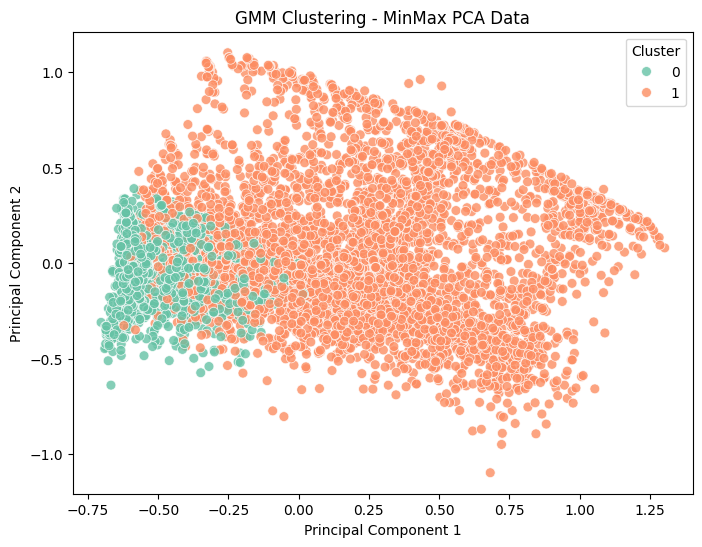

In [187]:
# Find the dataset with the best silhouette score
best_dataset_title = max(silhouette_scores, key=silhouette_scores.get)
best_df_with_clusters, best_gmm, best_score, best_n_clusters = results[best_dataset_title]

# Visualize the clustering for the dataset with the best silhouette score
print(f"\nThe best silhouette score is for {best_dataset_title}: {best_score:.3f}")

# Visualize the clusters using a scatter plot (first 2 PCs)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=best_df_with_clusters["PC_1"], y=best_df_with_clusters["PC_2"], hue=best_df_with_clusters['Cluster'], palette="Set2", s=50, alpha=0.8)
plt.title(f'GMM Clustering - {best_dataset_title}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

---

Agglomerative Clustering Model Optimization

In [188]:
# Function to build and evaluate Agglomerative Clustering model
def build_agglomerative_model(pca_data, n_clusters, title):
    # Initialize and fit the Agglomerative Clustering model
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_labels = agglomerative.fit_predict(pca_data)

    # Add the cluster labels to the DataFrame
    df_with_clusters = pd.DataFrame(pca_data, columns=[f"PC_{i+1}" for i in range(pca_data.shape[1])])
    df_with_clusters['Cluster'] = cluster_labels

    # Calculate silhouette score
    silhouette_avg = silhouette_score(pca_data, cluster_labels)

    # Print basic information
    print(f"{title} - Optimal Clusters: {n_clusters}")
    print(f"Silhouette Score: {silhouette_avg:.3f}\n")

    return df_with_clusters, agglomerative, silhouette_avg

# Function to optimize Agglomerative Clustering parameters using silhouette score
def optimize_agglomerative_clusters(pca_data, cluster_range, title):
    best_n_clusters = None
    best_score = -1
    best_model = None
    best_df_with_clusters = None

    for n_clusters in cluster_range:
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
        cluster_labels = agglomerative.fit_predict(pca_data)
        
        # Only consider configurations with more than one cluster
        if len(np.unique(cluster_labels)) > 1:
            score = silhouette_score(pca_data, cluster_labels)
            if score > best_score:
                best_score = score
                best_n_clusters = n_clusters
                best_model = agglomerative
                best_df_with_clusters = pd.DataFrame(pca_data, columns=[f"PC_{i+1}" for i in range(pca_data.shape[1])])
                best_df_with_clusters['Cluster'] = cluster_labels


    # Return the best clustering DataFrame, Agglomerative model, and silhouette score
    return best_df_with_clusters, best_model, best_score, best_n_clusters

# Optimize and store silhouette scores
silhouette_scores = {}

# Example usage on PCA-transformed datasets
pca_datasets = {
    "MinMax PCA Data": minmax_pca_data,
    "Standard PCA Data": standard_pca_data,
    "Robust PCA Data": robust_pca_data
}

cluster_range = range(2, 6)

# Store the results
results = {}

for title, pca_data in pca_datasets.items():
    df_with_clusters, agglomerative, score, n_clusters = optimize_agglomerative_clusters(pca_data, cluster_range, title)
    silhouette_scores[title] = score
    results[title] = (df_with_clusters, agglomerative, score, n_clusters)

# Display all silhouette scores
print("\nSilhouette Scores for all datasets:")
for title, (df_with_clusters, agglomerative, score, n_clusters) in results.items():
    print(f"{title} - Best number of clusters: {n_clusters}, Best Silhouette Score: {score:.15f}")



Silhouette Scores for all datasets:
MinMax PCA Data - Best number of clusters: 2, Best Silhouette Score: 0.357911192660829
Standard PCA Data - Best number of clusters: 2, Best Silhouette Score: 0.267867477982830
Robust PCA Data - Best number of clusters: 2, Best Silhouette Score: 0.764984780615708


Agglomerative Clustering Model


The best silhouette score is for Robust PCA Data: 0.765


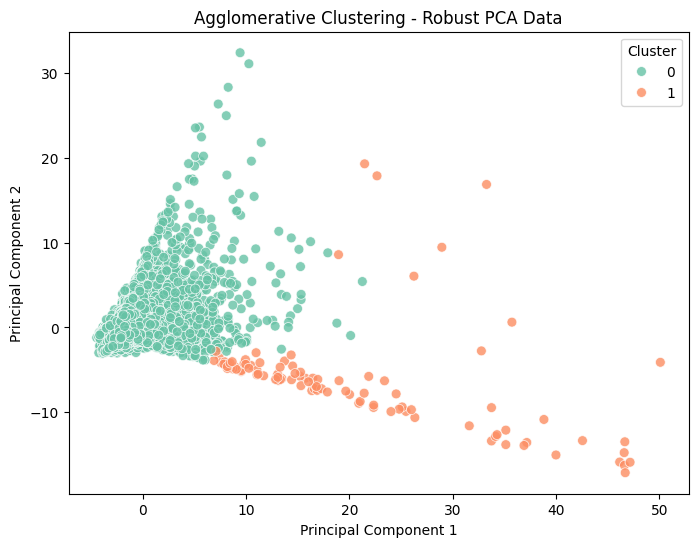

In [189]:
# Find the dataset with the best silhouette score
best_dataset_title = max(silhouette_scores, key=silhouette_scores.get)
best_df_with_clusters, best_agglomerative, best_score, best_n_clusters = results[best_dataset_title]

# Visualize the clustering for the dataset with the best silhouette score
print(f"\nThe best silhouette score is for {best_dataset_title}: {best_score:.3f}")

# Visualize the clusters using a scatter plot (first 2 PCs)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=best_df_with_clusters["PC_1"], y=best_df_with_clusters["PC_2"], hue=best_df_with_clusters['Cluster'], palette="Set2", s=50, alpha=0.8)
plt.title(f'Agglomerative Clustering - {best_dataset_title}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

---

Affinity Propagation Model Optimization

In [190]:
# Function to randomly sample data when using NumPy arrays
def random_sample_numpy(pca_data, frac=0.2, random_state=42):
    np.random.seed(random_state)
    n_samples = int(len(pca_data) * frac)
    sampled_indices = np.random.choice(pca_data.shape[0], size=n_samples, replace=False)
    return pca_data[sampled_indices, :]

# Function to build and evaluate Affinity Propagation model with sampling and limited iterations
def build_affinity_propagation_model_with_sampling(pca_data, damping_value, title, frac=0.2):
    sampled_data = random_sample_numpy(pca_data, frac=frac, random_state=42)
    
    # Initialize and fit the Affinity Propagation model with limited iterations
    affinity = AffinityPropagation(damping=damping_value, max_iter=200, convergence_iter=15, random_state=42)
    cluster_labels = affinity.fit_predict(sampled_data)

    # Add the cluster labels to the sampled DataFrame
    df_with_clusters = pd.DataFrame(sampled_data, columns=[f"PC_{i+1}" for i in range(sampled_data.shape[1])])
    df_with_clusters['Cluster'] = cluster_labels

    # Calculate silhouette score
    silhouette_avg = silhouette_score(sampled_data, cluster_labels)

    return df_with_clusters, affinity, silhouette_avg

# Function to optimize Affinity Propagation parameters with sampling and limited iterations
def optimize_affinity_propagation_with_sampling(pca_data, damping_range, title, frac=0.2):
    best_damping_value = None
    best_score = -1
    best_model = None
    best_df_with_clusters = None

    for damping_value in damping_range:
        sampled_data = random_sample_numpy(pca_data, frac=frac, random_state=42)
        affinity = AffinityPropagation(damping=damping_value, max_iter=200, convergence_iter=15, random_state=42)
        cluster_labels = affinity.fit_predict(sampled_data)
        
        if len(np.unique(cluster_labels)) > 1:
            score = silhouette_score(sampled_data, cluster_labels)
            if score > best_score:
                best_score = score
                best_damping_value = damping_value
                best_model = affinity
                best_df_with_clusters = pd.DataFrame(sampled_data, columns=[f"PC_{i+1}" for i in range(sampled_data.shape[1])])
                best_df_with_clusters['Cluster'] = cluster_labels

    return best_df_with_clusters, best_model, best_score, best_damping_value

# Optimize and store silhouette scores
silhouette_scores = {}

# Example usage on PCA-transformed datasets
pca_datasets = {
    "MinMax PCA Data": minmax_pca_data,
    "Standard PCA Data": standard_pca_data,
    "Robust PCA Data": robust_pca_data
}

damping_range = [0.5, 0.6, 0.7, 0.8, 0.9]

# Store the results
results = {}

for title, pca_data in pca_datasets.items():
    df_with_clusters, affinity, score, best_damping_value = optimize_affinity_propagation_with_sampling(pca_data, damping_range, title, frac=0.2)
    silhouette_scores[title] = score
    results[title] = (df_with_clusters, affinity, score, best_damping_value)

# Display all silhouette scores
print("\nSilhouette Scores for all datasets:")
for title, (df_with_clusters, affinity, score, best_damping_value) in results.items():
    print(f"{title} - Best damping value: {best_damping_value}, Best Silhouette Score: {score:.15f}")


Silhouette Scores for all datasets:
MinMax PCA Data - Best damping value: 0.8, Best Silhouette Score: 0.292341345430752
Standard PCA Data - Best damping value: 0.9, Best Silhouette Score: 0.190125751860207
Robust PCA Data - Best damping value: 0.7, Best Silhouette Score: 0.271337580854983


Affinity Propagation Model


The best silhouette score is for MinMax PCA Data: 0.292


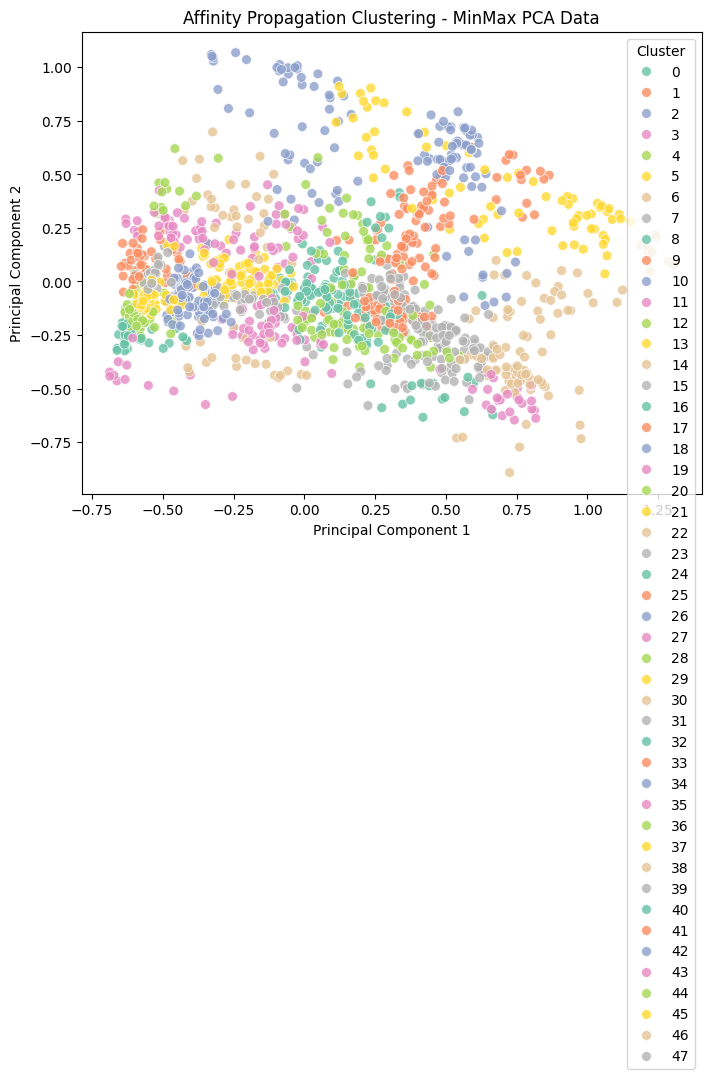

In [191]:
# Find the dataset with the best silhouette score
best_dataset_title = max(silhouette_scores, key=silhouette_scores.get)
best_df_with_clusters, best_affinity, best_score, best_damping_value = results[best_dataset_title]

# Visualize the clustering for the dataset with the best silhouette score
print(f"\nThe best silhouette score is for {best_dataset_title}: {best_score:.3f}")

# Visualize the clusters using a scatter plot (first 2 PCs)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=best_df_with_clusters["PC_1"], y=best_df_with_clusters["PC_2"], hue=best_df_with_clusters['Cluster'], palette="Set2", s=50, alpha=0.8)
plt.title(f'Affinity Propagation Clustering - {best_dataset_title}')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

---

## PART 4 - INTERPRETING CLUSTERS

- Characterize the clusters formed: What kind of customers fall into each cluster? 
    What features are most significant in distinguishing between clusters?

In [184]:
original_data_with_clusters = df_winsorized.copy()
original_data_with_clusters['Cluster'] = hdbscan_labels

# Filter out noise points (-1) for clearer analysis of clusters
clustered_data = original_data_with_clusters[original_data_with_clusters['Cluster'] != -1]

# Calculate the mean values of each feature for each cluster
cluster_characteristics = clustered_data.groupby('Cluster').mean()

# Create lists for characteristics of each cluster
cluster_0_characteristics = cluster_characteristics.loc[0].to_dict()
cluster_1_characteristics = cluster_characteristics.loc[1].to_dict() 

# Print the characteristics in vertical list form
print("Cluster 0 Characteristics:")
for key, value in cluster_0_characteristics.items():
    print(f"{key}: {value:.2f}")

print("\nCluster 1 Characteristics:")
for key, value in cluster_1_characteristics.items():
    print(f"{key}: {value:.2f}")

Cluster 0 Characteristics:
balance: 5145.41
balance_frequency: 1.00
purchases: 664.47
installments_purchases: 589.17
cash_advance: 921.41
purchases_frequency: 0.49
oneoff_purchases_frequency: 0.04
cash_advance_frequency: 0.07
credit_limit: 5380.56
payments: 1255.45
minimum_payments: 29965.99
prc_full_payment: 0.00

Cluster 1 Characteristics:
balance: 1574.49
balance_frequency: 0.89
purchases: 948.61
installments_purchases: 405.33
cash_advance: 969.18
purchases_frequency: 0.50
oneoff_purchases_frequency: 0.21
cash_advance_frequency: 0.14
credit_limit: 4493.34
payments: 1721.21
minimum_payments: 764.63
prc_full_payment: 0.16


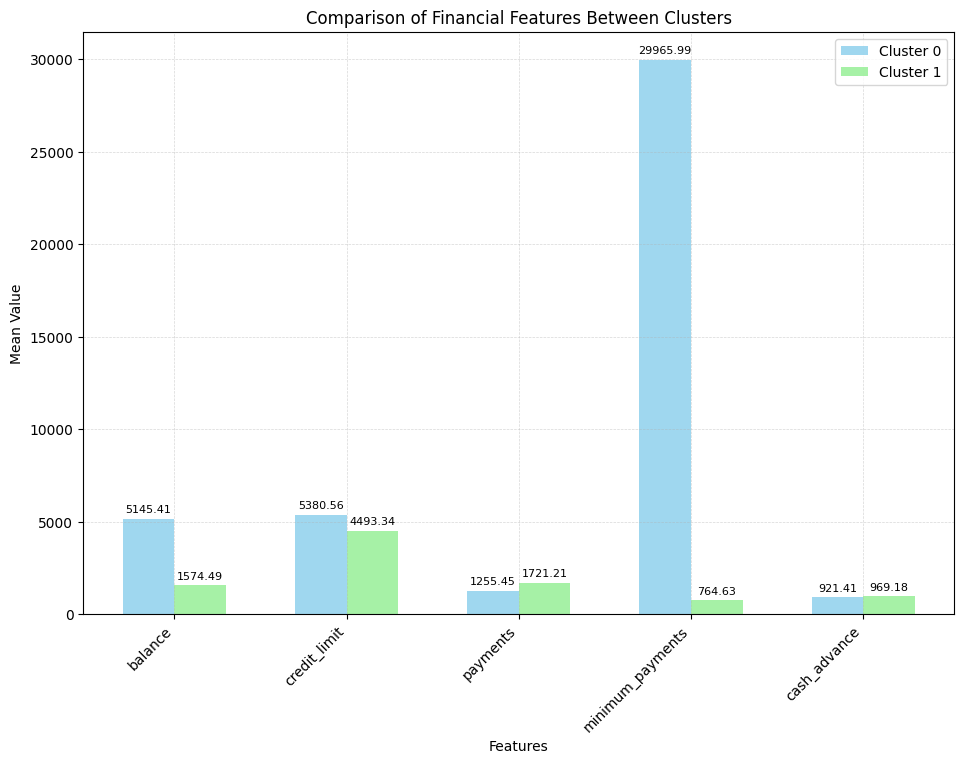

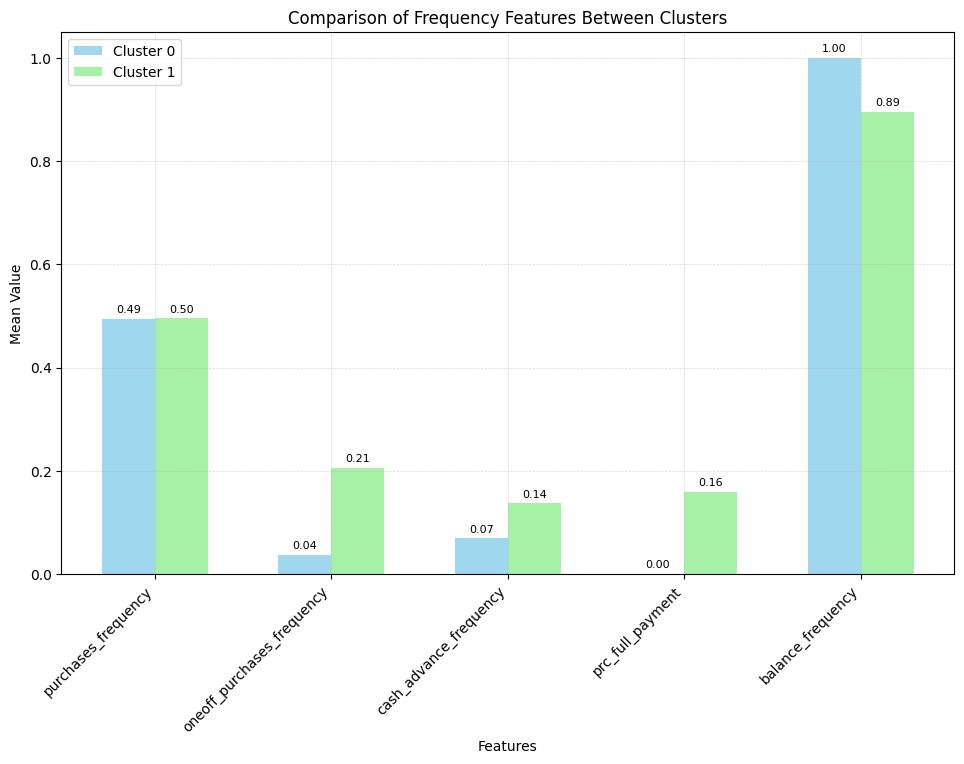

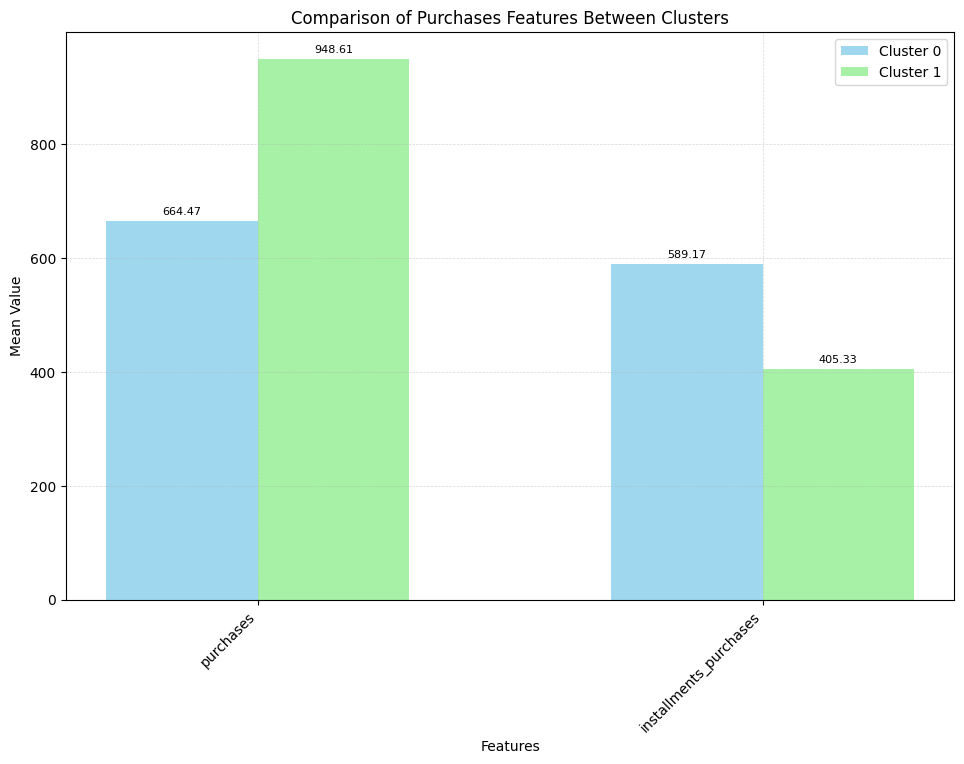

In [185]:
# Separate features based on scales (adjust as needed)
financial_features = ['balance', 'credit_limit', 'payments', 'minimum_payments', 'cash_advance']
frequency_features = ['purchases_frequency', 'oneoff_purchases_frequency', 'cash_advance_frequency', 
                      'prc_full_payment', 'balance_frequency']
purchases_features = ['purchases', 'installments_purchases']

# Function to split features into groups for comparison
def split_and_plot_features(cluster_0, cluster_1, feature_group, title):
    # Extract features for the selected group
    cluster_0_values = {k: cluster_0[k] for k in feature_group if k in cluster_0}
    cluster_1_values = {k: cluster_1[k] for k in feature_group if k in cluster_1}

    # Create a combined bar chart for the selected group
    labels = list(cluster_0_values.keys())
    cluster_0_vals = list(cluster_0_values.values())
    cluster_1_vals = list(cluster_1_values.values())
    
    x = np.arange(len(labels))  # the label locations
    width = 0.3  # Reduce the width of the bars to create more space

    fig, ax = plt.subplots(figsize=(10, 8))  # Increase the figure size
    bar1 = ax.bar(x - width/2, cluster_0_vals, width, label='Cluster 0', color='skyblue', alpha=0.8)
    bar2 = ax.bar(x + width/2, cluster_1_vals, width, label='Cluster 1', color='lightgreen', alpha=0.8)

    # Add data labels with smaller font size
    for rect in bar1:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', 
                    fontsize=8, color='black')  # Smaller fontsize

    for rect in bar2:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', 
                    fontsize=8, color='black')  # Smaller fontsize

    # Add labels, grid, and title
    ax.set_xlabel('Features', fontsize=10)
    ax.set_ylabel('Mean Value', fontsize=10)
    ax.set_title(title, fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.legend()
    ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.5)

    plt.tight_layout(pad=2)  # Adjust padding to improve layout
    plt.show()

# Plot comparisons for financial features
split_and_plot_features(cluster_0_characteristics, cluster_1_characteristics, financial_features, 
                        'Comparison of Financial Features Between Clusters')

# Plot comparisons for frequency features
split_and_plot_features(cluster_0_characteristics, cluster_1_characteristics, frequency_features, 
                        'Comparison of Frequency Features Between Clusters')

# Plot comparisons for purchases features
split_and_plot_features(cluster_0_characteristics, cluster_1_characteristics, purchases_features, 
                        'Comparison of Purchases Features Between Clusters')

---

## PART 5 - ACTIONABLE INSIGHTS

- Provide business recommendations based on the clusters formed. How would you target different customer segments?